In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import sklearn.preprocessing as preprocessing 
import torchmetrics

accuracy_metric = torchmetrics.Accuracy(task="binary")
precision_metric = torchmetrics.Precision(task="binary")
recall_metric = torchmetrics.Recall(task="binary")
f1_metric = torchmetrics.F1Score(task="binary")
roc_auc_metric = torchmetrics.AUROC(task="binary")

In [2]:
# Load the dataset
df = pd.read_csv('creditcard.csv')
X = df.drop('Class', axis=1).values
y = df['Class'].values
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [4]:
# Normalize the data
# scaler = preprocessing.Normalizer()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [60]:
#Model 

class ModelClassifier(nn.Module):
    def __init__(self, in_feature, h1, h2, h3, out_features, ): 
        super().__init__()
        self.input = nn.Linear(in_feature, h1)
        self.hidden1 = nn.Linear(h1, h2)
        self.hidden2 = nn.Linear(h2, h3)
        self.output = nn.Linear(h3, out_features)
    
    def forward(self, x):
        x = torch.relu(self.input(x))
        x = torch.relu(self.hidden1(x))
        x = torch.relu(self.hidden2(x))
        x = self.output(x)
        return x
        
model = ModelClassifier(X.shape[1], 64, 64, 64, 1)


In [61]:
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
#Difference notable entre lr=0.001 et lr=0.0001 



In [62]:
# Epochs 
epochs = 2000
losses = []
f1s = []
for i in range(epochs):
    model.train()
    
    y_pred = model(torch.tensor(X_train).float())  
    loss = criterion(y_pred, torch.tensor(y_train).float().view(-1, 1))
    losses.append(loss.item())
    f1 = f1_metric(y_pred, torch.tensor(y_train).float().view(-1,1))
    f1s.append(f1)

    if i % 100 == 0:
        print(f'Epoch {i} loss: {loss.item()}, f1: {f1}')
    
    # Backward pass
        # 3. Zero grad of the optimizer
    optimizer.zero_grad() #Zero the gradients due to the fact that pytorch accumulates the gradients on subsequent backward passes

    # 4. Loss backwards
    loss.backward() #Calculate the gradients

    # 5. Progress the optimizer
    optimizer.step() #Update the weights

Epoch 0 loss: 313.7626953125, f1: 0.0036476028617471457
Epoch 100 loss: 0.6422472596168518, f1: 0.0
Epoch 200 loss: 0.5925578474998474, f1: 0.0
Epoch 300 loss: 0.5281516909599304, f1: 0.0
Epoch 400 loss: 0.4517115652561188, f1: 0.0
Epoch 500 loss: 0.36541426181793213, f1: 0.0
Epoch 600 loss: 0.27150270342826843, f1: 0.0
Epoch 700 loss: 0.16871920228004456, f1: 0.0
Epoch 800 loss: 0.06019100546836853, f1: 0.0
Epoch 900 loss: 0.026205802336335182, f1: 0.25196850299835205
Epoch 1000 loss: 0.022286320105195045, f1: 0.3308270573616028
Epoch 1100 loss: 0.025621647015213966, f1: 0.48376622796058655
Epoch 1200 loss: 0.01808815822005272, f1: 0.4908789396286011
Epoch 1300 loss: 0.015712466090917587, f1: 0.5048859715461731
Epoch 1400 loss: 0.01989281363785267, f1: 0.5096774101257324
Epoch 1500 loss: 0.016224419698119164, f1: 0.5500794649124146
Epoch 1600 loss: 0.015642719343304634, f1: 0.5477706789970398
Epoch 1700 loss: 1.0890488624572754, f1: 0.0047846888191998005
Epoch 1800 loss: 0.58229118585

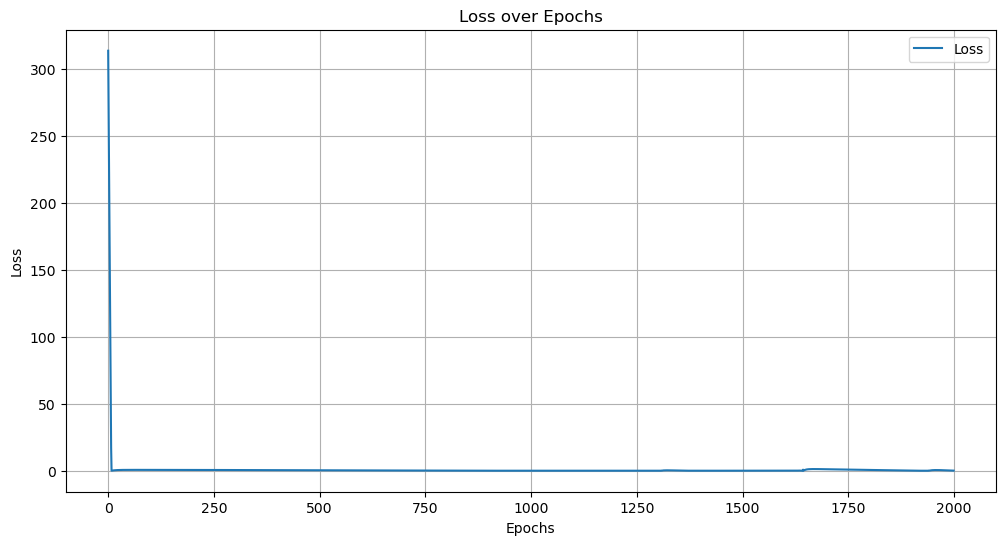

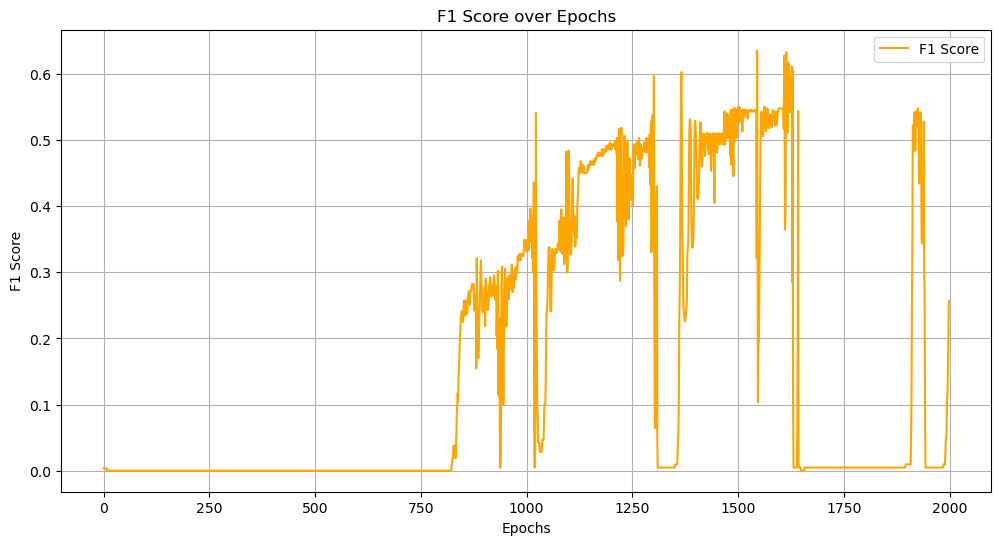

In [66]:
# Figure pour les pertes
figLoss, pltLoss = plt.subplots(1, 1, figsize=(12, 6))
pltLoss.plot(range(epochs), losses, label='Loss')
pltLoss.set_title('Loss over Epochs')
pltLoss.set_xlabel('Epochs')
pltLoss.set_ylabel('Loss')
pltLoss.legend()
pltLoss.grid(True)

# Figure pour le F1 score
figF1, pltF1 = plt.subplots(1, 1, figsize=(12, 6))
pltF1.plot(range(epochs), f1s, label='F1 Score', color='orange')
pltF1.set_title('F1 Score over Epochs')
pltF1.set_xlabel('Epochs')
pltF1.set_ylabel('F1 Score')
pltF1.legend()
pltF1.grid(True)


In [67]:
#Evaluation
model.eval()
with torch.inference_mode():
    y_pred = model(torch.tensor(X_test).float())
    loss = criterion(y_pred, torch.tensor(y_test).float().view(-1, 1))
    
print(loss)   

tensor(0.1413)
